In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import glob as glob
import pandas as pd

# Making list of dataframe from all batches

In [65]:
path = r"C:\Users\user\Downloads\ProcessedFile1" #path in your computer for all the datasets
namesofMySeries = []
files = glob.glob(path + "\*.csv") 
datasetlist = []
for filename in files:
    df = pd.read_csv(filename,on_bad_lines = 'skip')   
    datasetlist.append(df)
    namesofMySeries.append(filename[-8:-4])
    

# Data Preprocessing

In [79]:
outlierprocessedbatches = []
i = 0
for bactchesdf in datasetlist:
    bactchesdf['zeit'] = pd.to_datetime(bactchesdf['zeit']) #converting zeit column in to datetime formate
    bactchesdf.drop('Unnamed: 0',axis=1,inplace = True)    #dropping Unnamed: 0 columns from all the dataframe
    bactchesdf.sort_values(by='zeit', inplace = True)      #sorting all the dataframe based on zeit column
    bactchesdf.reset_index(drop = True,inplace= True)
    # doing something similar to One-Hot Coding
    sensor_messwert_list = list(zip(bactchesdf.sensorid,bactchesdf.messwert))
    dict = {}
    df = pd.DataFrame()
    for ele in sensor_messwert_list:
        num= str(ele[0])
        dict[num] = ele[1]    
        df = df.append(dict,ignore_index=True)

    zeit_column =  bactchesdf['zeit']
    df2 = pd.DataFrame()
    df2 = pd.concat([zeit_column, df], axis=1, join='inner')
    df2.fillna(0,inplace= True)
    df2.set_index('zeit')
    path = './ProcessedFile/{}.csv'.format(namesofMySeries[i])  # converting all the preprocessed dataframe in to CSV file
    df2.to_csv(path)
    i = i + 1

# Importing the Processedfile from the directory

In [68]:
path = r"C:\Users\user\Downloads\ProcessedFile1"
#namesofMySeries = []
files = glob.glob(path + "/*.csv")

processedbatches = []


#Step 3: checking each csv for missing required parameters
for filename in files:
    bactchesdf = pd.DataFrame()
    bactchesdf = pd.read_csv(filename,on_bad_lines = 'skip')   
    bactchesdf = bactchesdf.iloc[: , 1:]
    bactchesdf['zeit'] = pd.to_datetime(bactchesdf['zeit']) 
    
    bactchesdf.set_index("zeit",inplace=True)
    bactchesdf.sort_index(inplace=True)
    processedbatches.append(bactchesdf)

In [69]:
processedbatches[3].head() #how our dataframe look like for every batch

,121,112,117,94,115,109,131,110,114,145,...,134,132,127,133,126,128,130,108,107,113
zeit,,,,,,,,,,,,,,,,,,,,,
2022-06-08 00:00:00.100,-0.0047,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-08 00:00:00.116,-0.0047,0.000122,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-08 00:00:00.125,-0.0047,0.000122,-0.9807,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-08 00:00:00.129,-0.0047,0.000122,-0.9807,0.0475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-08 00:00:00.145,-0.0047,0.000122,-0.9807,0.0475,104.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
namesofMySeries

['1009',
 '1034',
 '1066',
 '1069',
 '1113',
 '1114',
 '1121',
 '1124',
 '1128',
 '1133',
 '1155',
 '1182',
 '1203',
 '1219',
 '1222',
 '1299',
 '1314',
 '1339',
 '1341',
 '1362',
 '1363',
 '1417',
 '1491',
 '1505',
 '1508',
 '1553',
 '1561',
 '1564',
 '1565',
 '1583',
 '1584',
 '1585',
 '1598',
 '1604',
 '1619',
 '1686',
 '1705',
 '1734',
 '1736',
 '1772',
 '1775',
 '1807',
 '1815',
 '1829',
 '1841',
 '1851',
 '1852',
 '1855',
 '1873',
 '1900',
 '1921',
 '1957',
 '2050',
 '2055',
 '2063',
 '2067',
 '2079',
 '2093',
 '2117',
 '2118',
 '2123',
 '2132',
 '2142',
 '2246',
 '2335',
 '2370',
 '2395',
 '2401',
 '2495',
 '2526',
 '2536',
 '2605',
 '2628',
 '2657',
 '2663',
 '2666',
 '2674',
 '2690',
 '2692',
 '2693',
 '2781',
 '2787',
 '2804',
 '2850',
 '2898',
 '2913',
 '2929',
 '2936',
 '2942',
 '2950',
 '2960',
 '2965',
 '2980',
 '2981',
 '2987',
 '3002',
 '3010',
 '3016',
 '3024',
 '3041',
 '3082',
 '3097',
 '3125',
 '3151',
 '3176',
 '3258',
 '3284',
 '3304',
 '3307',
 '3308',
 '3320',
 

# Visualizing 6 batches based on time series 

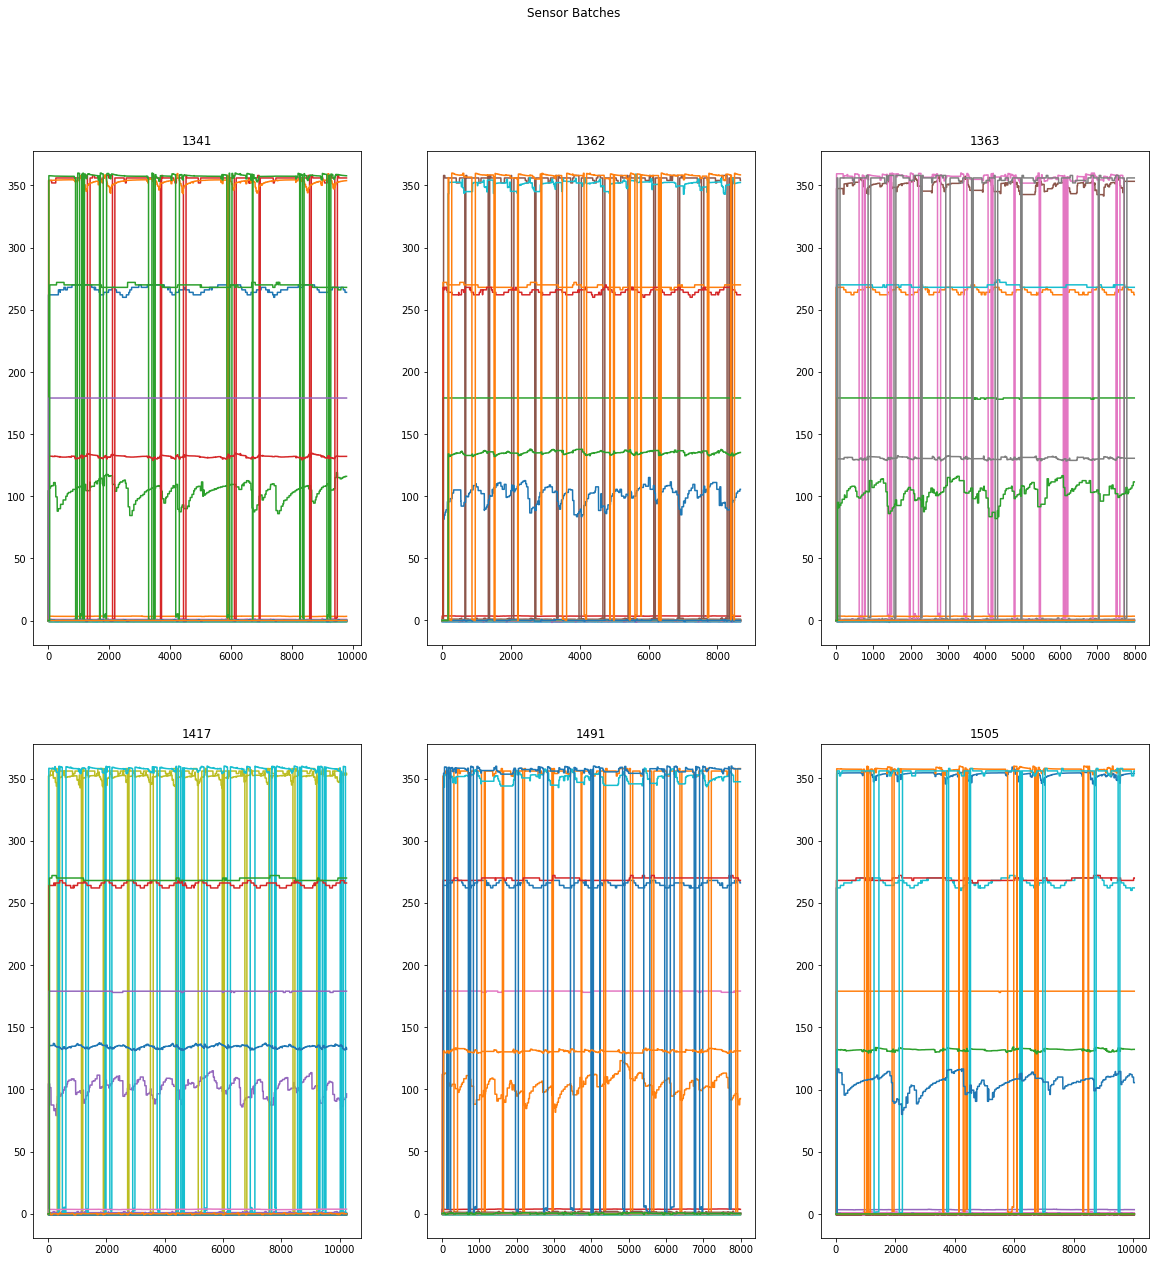

In [55]:
fig, axs = plt.subplots(2,3,figsize=(20,20))
fig.suptitle('Sensor Batches')
for i in range(2):
    for j in range(3):
        if i*3+j+1>len(processedbatches): 
            continue
        axs[i, j].plot(processedbatches[i*3+j].values)
        axs[i, j].set_title(namesofMySeries[i*3+j])
plt.show()

# Performing Outlier Analysis using IQR(Inter Quartile Range)

In [63]:
outlierprocessedbatches = []

for bactchesdf in processedbatches:
    sensorid = ['126', '145', '118', '119', '120', '121', '129', '108', '131',
           '134', '130', '132', '113', '133', '128', '127', '107', '117', '110', '111', '114',
           '115', '112', '109','94','95','96','97','98','99','101','102']

    percentile25 = bactchesdf[sensorid].quantile(0.25)
    percentile75 = bactchesdf[sensorid].quantile(0.75)

    for i in sensorid:
        iqr = percentile75[i] - percentile25[i]
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
    
    new_df_cap = bactchesdf.copy()
    for i in sensorid:
        new_df_cap[i] = np.where(
        new_df_cap[i] > upper_limit[i],
        upper_limit[i],
        np.where(
            new_df_cap[i] < lower_limit[i],
            lower_limit[i],
            new_df_cap[i]
        )
    )
    outlierprocessedbatches.append(new_df_cap)

# Visualizing 6 batches again after outlier analysis

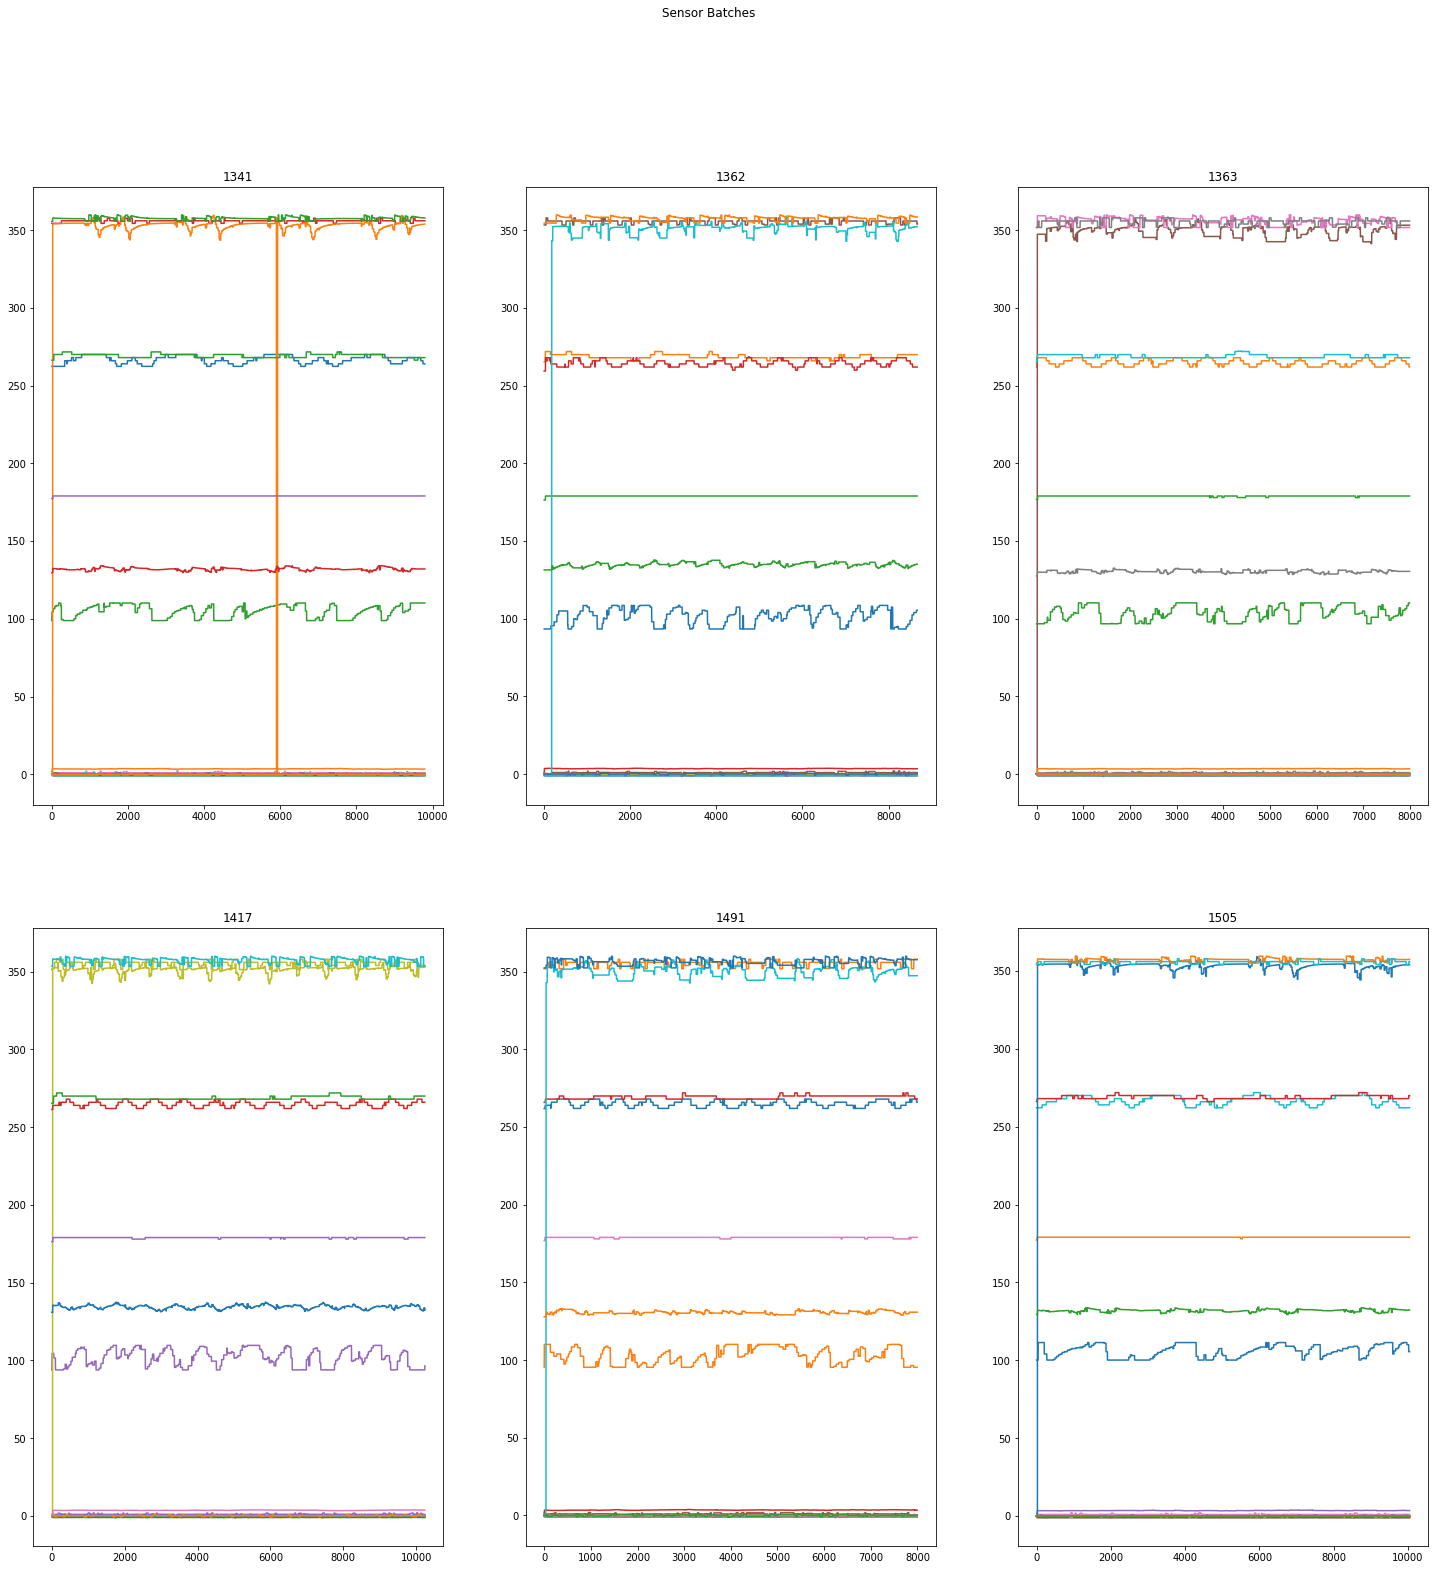

In [64]:
fig, axs = plt.subplots(2,3,figsize=(25,25))
fig.suptitle('Sensor Batches')
for i in range(2):
    for j in range(3):
        if i*3+j+1>len(outlierprocessedbatches): # pass the others that we can't fill
            continue
        axs[i, j].plot(outlierprocessedbatches[i*3+j].values)
        axs[i, j].set_title(namesofMySeries[i*3+j])
plt.show()

In [71]:
processedbatches[0] #how our dataframe looks like after outlier analysis

,130,127,115,110,112,95,96,97,98,94,...,102,132,128,131,126,108,117,107,111,113
zeit,,,,,,,,,,,,,,,,,,,,,
2022-06-08 00:00:00.103,-0.000360,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.0
2022-06-08 00:00:00.108,-0.000360,0.055908,0.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.0
2022-06-08 00:00:00.110,-0.000360,0.055908,104.5,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.0
2022-06-08 00:00:00.113,-0.000360,0.055908,104.5,-0.001366,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.0
2022-06-08 00:00:00.117,-0.000360,0.055908,104.5,-0.001366,-0.000083,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-08 00:01:03.960,0.002075,0.010681,116.0,-0.000100,0.001114,-0.1032,0.9921,0.0049,-0.0027,0.0465,...,132.065,179.0,-0.984375,0.000100,-0.060303,-0.957031,-0.8731,0.04126,0.000931,268.0
2022-06-08 00:01:03.962,0.002075,0.010681,116.0,-0.000100,0.001114,-0.1032,0.9921,0.0049,-0.0027,0.0465,...,132.065,179.0,-0.984375,0.000100,-0.060303,-0.957031,-0.8731,0.04126,0.000931,268.0
2022-06-08 00:01:03.967,0.002075,0.010681,116.0,-0.000100,0.001114,-0.1032,0.9921,0.0049,-0.0027,0.0465,...,132.065,179.0,-0.984375,-0.001114,-0.060303,-0.957031,-0.8731,0.04126,0.000931,268.0


# find the longest series of the series and elongate others 

In [72]:
series_lengths = {len(series) for series in processedbatches}
print(series_lengths)
 

{8192, 10241, 8201, 8206, 8214, 8221, 8234, 8236, 8245, 8247, 8255, 8262, 6217, 10317, 8270, 8274, 6251, 8309, 8323, 8327, 6280, 6307, 8372, 8376, 6340, 8403, 8406, 8431, 8439, 6395, 8446, 8450, 8459, 8469, 8473, 6426, 8479, 8482, 8483, 8492, 6445, 8504, 6457, 8509, 8510, 8512, 8533, 8536, 8539, 8541, 8542, 8544, 8561, 8566, 8569, 8574, 6532, 6542, 8621, 8625, 6581, 6582, 6583, 8638, 8639, 8648, 8654, 8664, 8666, 8677, 8678, 8685, 8689, 8691, 8702, 8707, 8708, 8739, 8740, 8741, 8761, 8768, 8778, 8780, 6744, 6757, 6761, 8815, 8816, 8818, 6771, 8823, 8825, 8830, 8841, 8847, 8857, 8860, 8866, 8871, 8873, 8874, 6832, 8886, 6838, 8909, 8912, 8914, 6870, 6880, 8938, 8940, 8947, 8953, 8955, 6910, 8987, 8997, 9003, 9012, 9014, 9027, 9030, 6982, 7011, 9069, 9071, 7024, 7032, 7045, 7048, 9101, 9108, 9110, 9116, 9120, 9121, 9128, 9134, 7099, 9150, 9151, 9160, 9162, 7116, 9164, 9166, 7123, 9175, 7133, 9185, 7140, 9189, 9202, 9203, 9209, 7168, 9217, 9222, 9224, 9229, 7199, 9262, 9264, 9271, 9273, 9

# reindexed the series that are not as long as the longest one and fill the empty dates with np.nan

In [73]:
max_len = max(series_lengths)
longest_series = None
for series in processedbatches:
    if len(series) == max_len:
        longest_series = series

In [74]:
processedbatches[4].head()
for i in range(len(processedbatches)):
    print(processedbatches[i].index.is_unique)
    print(processedbatches[i].index.duplicated())
    processedbatches[i] = processedbatches[i].loc[~processedbatches[i].index.duplicated(), :]

False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False  True False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False

[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False  True]
False
[False False False ... False False False]
False
[False  True  True ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False False False ... False False False]
False
[False  True False ... False False False]
False
[False False False ... False False False

In [75]:
problems_index = []

for i in range(len(processedbatches)):
    if len(processedbatches[i])!= max_len:
        problems_index.append(i)
        processedbatches[i] = processedbatches[i].reindex(longest_series.index)

# Check how many series are polluted with nan values

In [76]:
def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)

In [77]:
nan_counter(processedbatches)

435


# used linear interpolation to fill the gap

In [78]:
for i in problems_index:
    processedbatches[i].interpolate(limit_direction="both",inplace=True)

In [79]:
nan_counter(outlierprocessedbatches)

0


In [81]:
nx,ny = processedbatches[435].shape
print(nx,ny)

10317 33


# scale of the series

In [82]:
from sklearn.preprocessing import MinMaxScaler

for i in range(len(processedbatches)):
    scaler = MinMaxScaler()
    processedbatches[i] = MinMaxScaler().fit_transform(processedbatches[i])
    nx,ny = processedbatches[i].shape
    print(nx,ny)
    processedbatches[i]= processedbatches[i].reshape(nx*ny)

10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
10317 33
1

# Curse of Dimensionality

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # converting in to 2 dimensions

mySeries_transformed = pca.fit_transform(processedbatches)

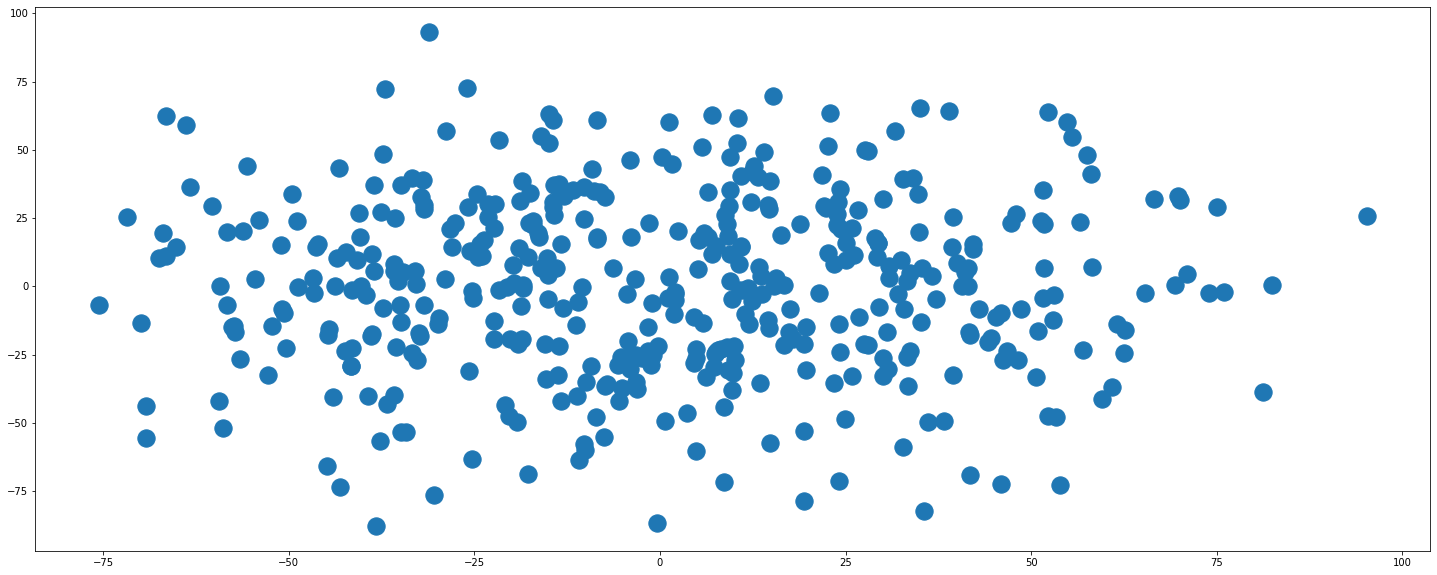

In [84]:
plt.figure(figsize=(25,10))
plt.scatter(mySeries_transformed[:,0],mySeries_transformed[:,1], s=300)
plt.show()

# Choosing K measure for Kmeans

In [86]:
import math

cluster_count = math.ceil(math.sqrt(len(processedbatches))) 
print(cluster_count)

21


In [87]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=cluster_count,max_iter=5000)

labels = kmeans.fit_predict(mySeries_transformed)

# Scatterplot of the cluster points

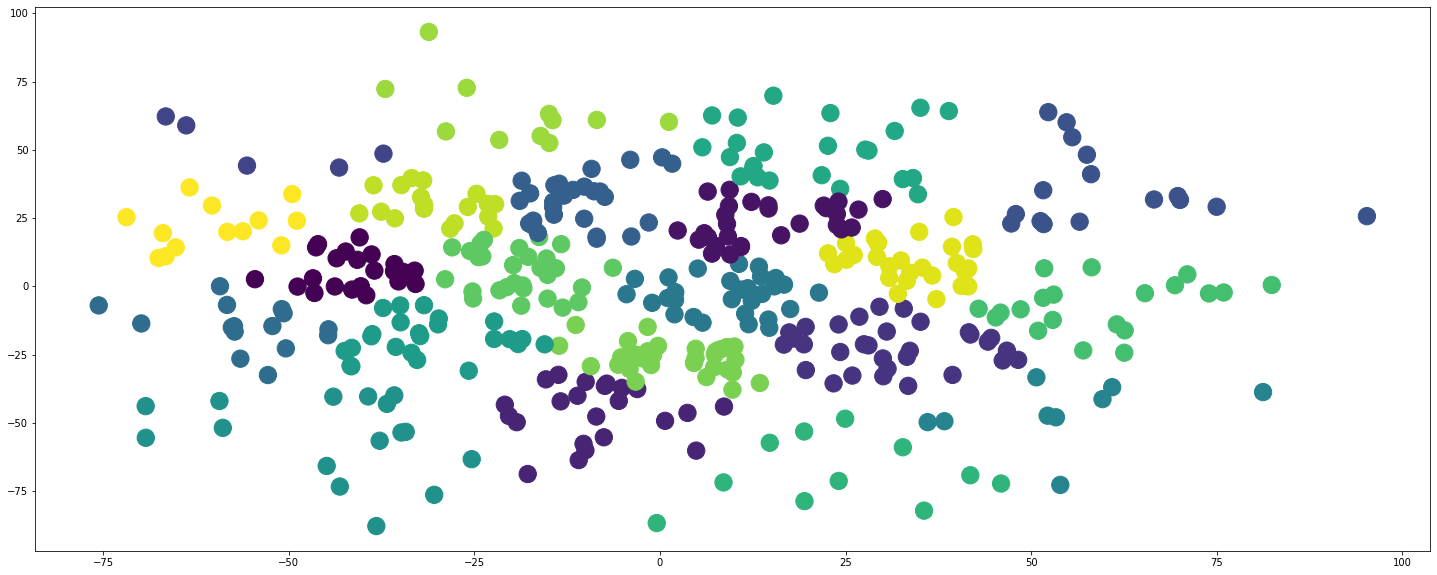

In [88]:
plt.figure(figsize=(25,10))
plt.scatter(mySeries_transformed[:, 0], mySeries_transformed[:, 1], c=labels, s=300)
plt.show()

# Bar Plots for total number of clusters

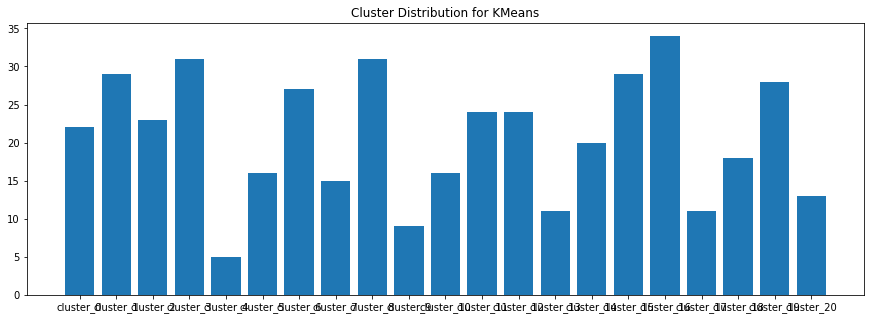

In [89]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["cluster_"+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [90]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
1505,Cluster 0
1564,Cluster 0
1561,Cluster 0
3928,Cluster 0
2050,Cluster 0
...,...
9592,Cluster 9
3016,Cluster 9
6893,Cluster 9
